<a href="https://colab.research.google.com/github/SGRGit/gwOsc/blob/FinalCode/DataPrepForBlipGlitchClassification_G.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
import sys
sys.path.append('/content/gdrive/My Drive/Colab Notebooks')

In [0]:
import gwpy
import numpy as np
import matplotlib.pyplot as plt
import math

****Analysis with LIGO data for Glitch Recognition using Q-Transforms****

In [0]:
#Import Blip Glitch o1 Data from gspy in Pandas Dataframe
import pandas as pd
raw_data = pd.read_csv("/content/gdrive/My Drive/gspy_blip_o1.csv")

glitch_data = raw_data[['GPStime','ifo', 'peakFreq', 'snr', 'amplitude', 'centralFreq','duration']]

In [0]:
import os
base_dir = "gdrive/My Drive/Colab Notebooks/GlitchNoiseClassification/"
seta = 'Glitch'
setb = 'Noise'

data_dir = os.path.join(base_dir, 'Data')
seta_data_dir = os.path.join(data_dir, seta)
seta_data_fnnames = os.listdir(seta_data_dir)

setb_data_dir = os.path.join(data_dir, setb)
setb_data_fnnames = os.listdir(setb_data_dir)

In [39]:
import os
files = os.listdir(setb_data_dir)
len(files)

1807

In [0]:
glitch_data_cln =  glitch_data.iloc[1885 : ]

In [0]:
glitch_data_cln.reset_index(inplace = True)

In [0]:
glitch_data_cln

,index,GPStime,ifo,peakFreq,snr,amplitude,centralFreq,duration
0,1885,1.130479e+09,L1,402.439,59.033,4.640000e-21,3992.322,0.709
1,1886,1.127704e+09,L1,225.349,49.544,7.310000e-22,662.101,0.438
2,1887,1.132742e+09,H1,137.711,37.614,3.130000e-22,291.364,0.563
3,1888,1.133612e+09,H1,324.754,11.049,2.040000e-22,446.874,0.039
4,1889,1.136404e+09,L1,402.439,51.062,1.580000e-19,1564.849,0.313
...,...,...,...,...,...,...,...,...
1230,3115,1.127063e+09,H1,180.507,8.031,1.070000e-22,222.291,0.125
1231,3116,1.128756e+09,H1,312.908,8.195,1.010000e-22,312.274,0.344
1232,3117,1.128127e+09,H1,53.485,8.049,1.140000e-21,83.413,0.094
1233,3118,1.134499e+09,L1,211.477,9.123,8.990000e-23,578.150,0.023


['L1', 'L1', 'H1', 'H1', 'L1', 'H1', 'H1', 'H1', 'H1', 'H1', 'L1', 'L1', 'H1', 'H1', 'H1', 'H1', 'H1', 'H1', 'H1', 'H1', 'L1', 'H1', 'L1', 'H1', 'L1', 'H1', 'L1', 'H1', 'H1', 'H1', 'H1', 'H1', 'L1', 'L1', 'H1', 'H1', 'L1', 'H1', 'L1', 'H1', 'L1', 'H1', 'L1', 'H1', 'H1', 'H1', 'L1', 'H1', 'H1', 'H1', 'H1', 'H1', 'L1', 'H1', 'H1', 'H1', 'H1', 'H1', 'H1', 'H1', 'L1', 'L1', 'H1', 'H1', 'H1', 'H1', 'L1', 'L1', 'L1', 'H1', 'H1', 'H1', 'L1', 'H1', 'L1', 'H1', 'H1', 'H1', 'L1', 'H1', 'H1', 'L1', 'H1', 'L1', 'L1', 'H1', 'H1', 'H1', 'H1', 'H1', 'H1', 'L1', 'H1', 'H1', 'L1', 'H1', 'H1', 'H1', 'H1', 'L1', 'H1', 'L1', 'H1', 'L1', 'L1', 'H1', 'H1', 'L1', 'H1', 'H1', 'H1', 'H1', 'L1', 'H1', 'H1', 'H1', 'H1', 'H1', 'H1', 'H1', 'L1', 'H1', 'H1', 'H1', 'H1', 'L1', 'H1', 'H1', 'H1', 'L1', 'H1', 'H1', 'H1', 'H1', 'H1', 'H1', 'L1', 'H1', 'L1', 'H1', 'H1', 'H1', 'H1', 'H1', 'H1', 'H1', 'H1', 'L1', 'H1', 'H1', 'H1', 'H1', 'H1', 'H1', 'H1', 'H1', 'L1', 'L1', 'H1', 'H1', 'L1', 'H1', 'H1', 'H1', 'H1', 'L1', 'H1

KeyboardInterrupt: ignored

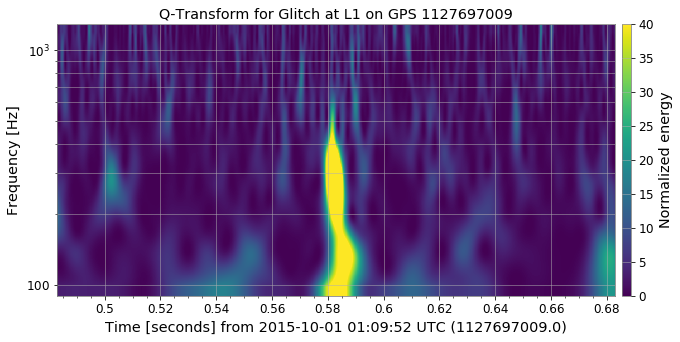

In [0]:
import time
from gwpy.timeseries import TimeSeries
epoch_glitch= np.empty(1001)
ifo_glitch = []
interval = np.empty(1001)
images_glitch = []

for i in range(0, 1001, 1):
  epoch_glitch[i] = int(glitch_data_cln['GPStime'][i])
  ifo_glitch.append(glitch_data_cln['ifo'][i])
  interval[i] = round((glitch_data_cln['GPStime'][i] %1), 3)
print(ifo_glitch, epoch_glitch, interval)

for a in range(0, 1001, 1):
  print(a)
  I = TimeSeries.fetch_open_data(ifo_glitch[a], epoch_glitch[a]-2, epoch_glitch[a]+2).q_transform(outseg = (epoch_glitch[a]+interval[a]-0.1 , epoch_glitch[a] +interval[a]+ 0.1))
  images_glitch.append(I)
  fig, ax = plt.subplots(1, 1, figsize = (10, 5))
  ax = plt.gca()
  ax.imshow(I)
  #ax.set_epoch(epoch_glitch[a])
  ax.set_xscale('seconds')
  ax.set_yscale('log')
  ax.set_ylabel('Frequency [Hz]')
  ax.grid(True, axis='y', which='both')
  ax.colorbar(cmap='viridis', label='Normalized energy', clim=[0, 40])
  ax.set_title('Q-Transform for Glitch at %s on GPS %d' %(ifo_glitch[a], epoch_glitch[a]))
  plt.savefig(os.path.join(seta_data_dir,'Q-Transform for Glitch at %s on GPS %d' %(ifo_glitch[a], epoch_glitch[a])))
  plt.close()
  time.sleep(0.01)